In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

1. Загрузка датасета

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Визуализация распределения Survived, Pclass, Age, Sex, Parch

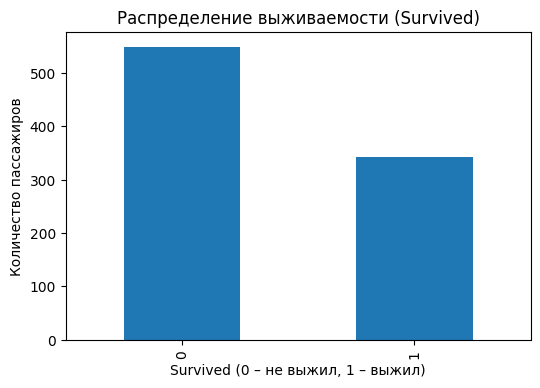

In [4]:
df["Survived"].value_counts().sort_index().plot(kind="bar", figsize=(6,4))
plt.title("Распределение выживаемости (Survived)")
plt.xlabel("Survived (0 – не выжил, 1 – выжил)")
plt.ylabel("Количество пассажиров")
plt.show()


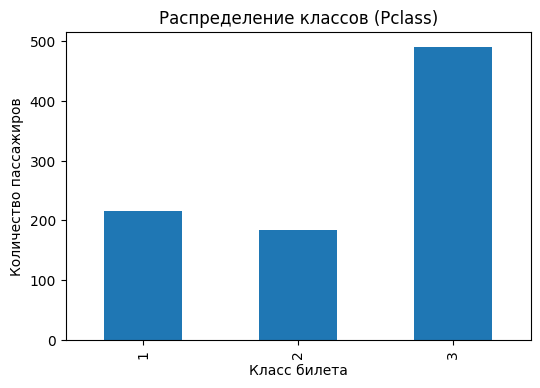

In [5]:
df["Pclass"].value_counts().sort_index().plot(kind="bar", figsize=(6,4))
plt.title("Распределение классов (Pclass)")
plt.xlabel("Класс билета")
plt.ylabel("Количество пассажиров")
plt.show()

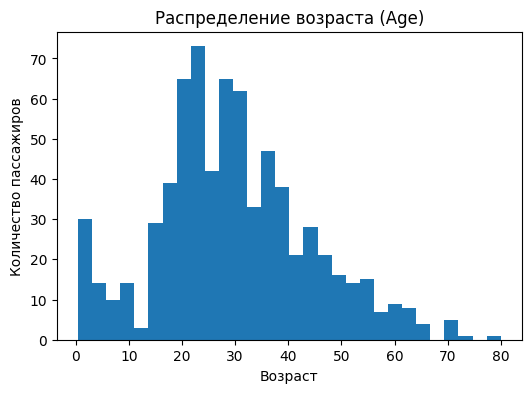

In [6]:
df["Age"].dropna().plot(kind="hist", bins=30, figsize=(6,4))
plt.title("Распределение возраста (Age)")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.show()


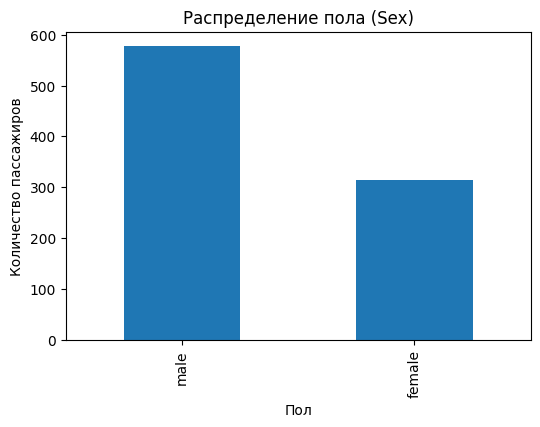

In [7]:
df["Sex"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Распределение пола (Sex)")
plt.xlabel("Пол")
plt.ylabel("Количество пассажиров")
plt.show()


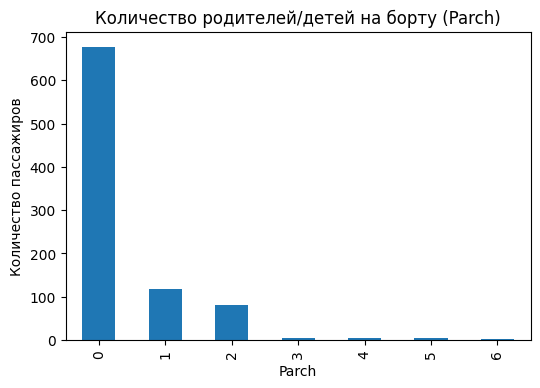

In [8]:
df["Parch"].value_counts().sort_index().plot(kind="bar", figsize=(6,4))
plt.title("Количество родителей/детей на борту (Parch)")
plt.xlabel("Parch")
plt.ylabel("Количество пассажиров")
plt.show()


3.  график типа boxplot для столбца Age

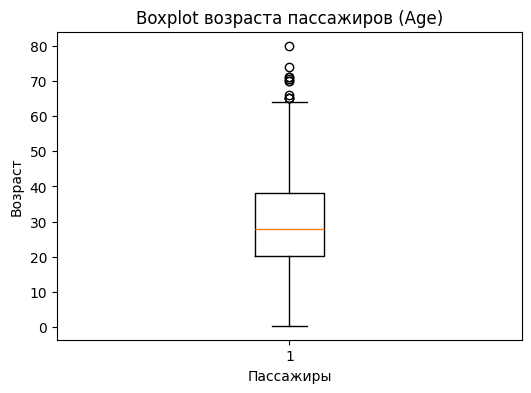

In [9]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["Age"].dropna())
plt.title("Boxplot возраста пассажиров (Age)")
plt.ylabel("Возраст")
plt.xlabel("Пассажиры")
plt.show()


4. Интерпретация полученного графика:

Медианный возраст находится примерно на уровне 28–30 лет, что означает, что половина пассажиров была моложе этого возраста, а половина — старше. Межквартильный размах (границы «коробки») лежит примерно между 20 и 38 годами, то есть основная часть пассажиров находилась в возрасте молодых и средних взрослых.

Нижний «ус» графика опускается почти до нуля, что отражает наличие на борту маленьких детей. Верхний «ус» поднимается до примерно 60–65 лет, однако выше него присутствуют отдельные точки — это выбросы, представляющие собой небольшое количество пожилых пассажиров старше 70 лет.

График показывает, что распределение возрастов несимметрично: большинство пассажиров были в возрасте от 20 до 40 лет, а доля как маленьких детей, так и очень пожилых людей была значительно ниже.

5. Построим график типа pie chart для переменных Survived, Pclass, подпишим доли в процентах

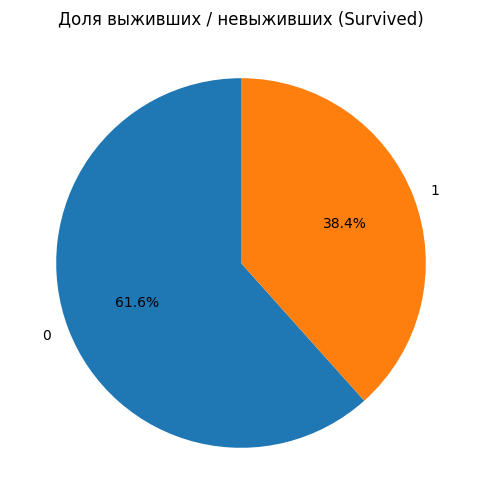

In [10]:
df["Survived"].value_counts().sort_index().plot(
    kind="pie", autopct="%1.1f%%", startangle=90, figsize=(6,6)
)
plt.title("Доля выживших / невыживших (Survived)")
plt.ylabel("")
plt.show()


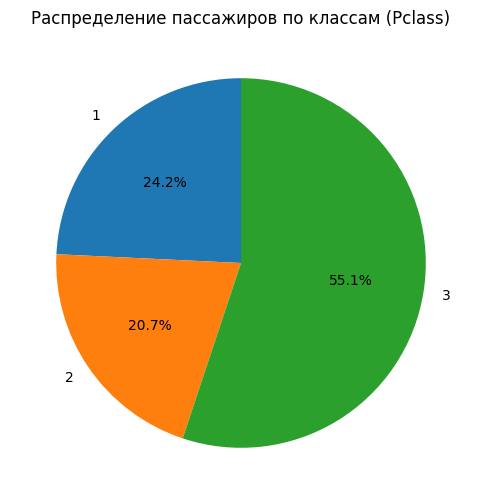

In [15]:
df["Pclass"].value_counts().sort_index().plot(
    kind="pie", autopct="%1.1f%%", startangle=90, figsize=(6,6)
)
plt.title("Распределение пассажиров по классам (Pclass)")
plt.ylabel("")
plt.show()


6. Построим график типа pairplot для всех числовых переменных датасета


In [16]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

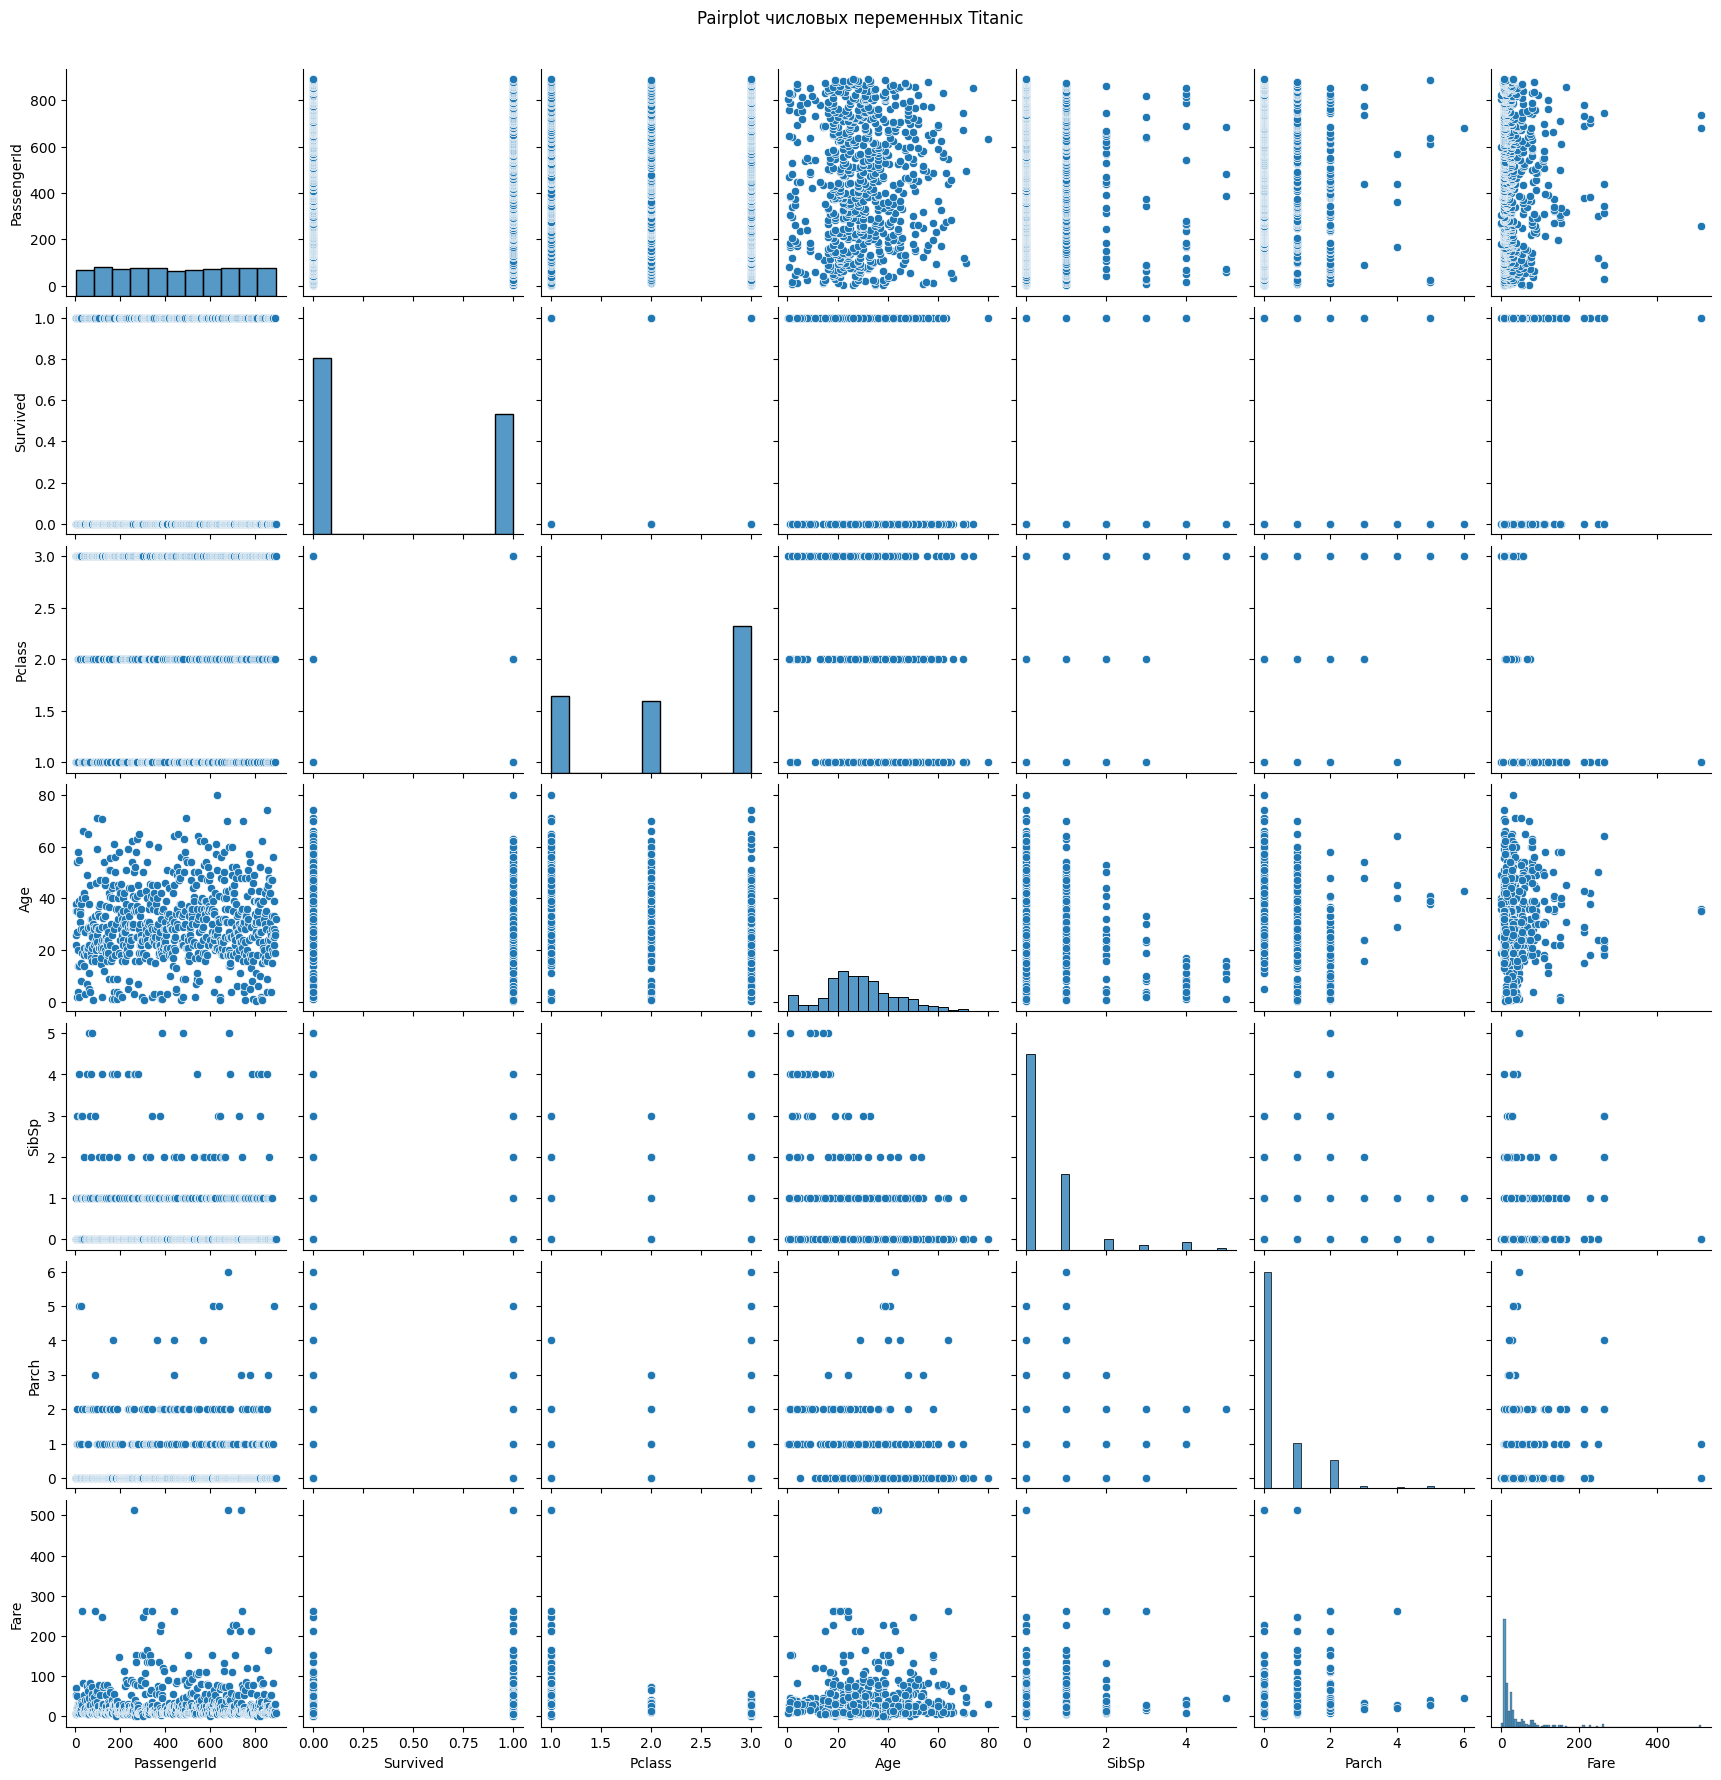

In [19]:
sns.pairplot(df[numeric_cols].dropna(), diag_kind="hist")
plt.suptitle("Pairplot числовых переменных Titanic", y=1.02)
plt.show()

7. Построим интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе

In [20]:
sunburst_df = df[["Pclass", "Sex"]].copy()
sunburst_df["count"] = 1
sunburst_df.head()

,Pclass,Sex,count
0,3,male,1
1,1,female,1
2,3,female,1
3,1,female,1
4,3,male,1


In [21]:
fig = px.sunburst(
    sunburst_df,
    path=["Pclass", "Sex"],
    values="count",
    title="Иерархия пассажиров: Класс → Пол (Sunburst)"
)
fig.show()


Задание 8 - снабдить все построенные графики наименованиями (title), подписями осей, легендами также выполнено на представленных графиках.